In [56]:
if (!require('devtools')) install.packages('devtools')
devtools::install_github('behavioral-ds/evently')

library(evently)
setup_ampl("/root/ampl")

library(repr)
library(dplyr)

Skipping install of 'evently' from a github remote, the SHA1 (9be4daa8) has not changed since last install.
  Use `force = TRUE` to force installation



# 1. Analiza zbioru

Zbiór danych zawiera ponad 3,2 miliarda tweetów oraz retweetów, scrappowanych z Twittera od 7 października do 7 listopada 2011 r. Pozostawione zostały tylko tweety, które zawierają co najmniej 50 retweetów, językiem oryginalnym tekstów jest angielski. Łącznie zbiór danych zawiera 166 076 tweetów.



In [57]:
dataset <- read.csv("data/data.csv")
index <- read.csv("data/index.csv")

In [58]:
head(dataset, 10)

,relative_time_second,number_of_followers
,<dbl>,<dbl>
1,0,33
2,84833,46828
3,84878,208
4,84883,37
5,84900,137
6,84904,254
7,84905,95
8,84910,178
9,84914,59


In [59]:
head(index, 10)

,tweet_id,post_time_day,start_ind,end_ind
,<dbl>,<dbl>,<int>,<int>
1,1.224346e+17,0.9266435,1,175
2,1.224497e+17,0.9681597,176,369
3,1.224502e+17,0.9695602,370,703
4,1.224430e+17,0.9497338,704,827
5,1.224566e+17,0.9873727,828,941
6,1.223103e+17,0.5837269,942,1029
7,1.223634e+17,0.7300926,1030,2418
8,1.222954e+17,0.5425347,2419,2490
9,1.223526e+17,0.7002546,2491,2545


W pliku *index.csv* możemy zauważyć zakresy indeksów z pliku *data.csv*, które należą do jednej kaskady (tweet początkowy - retweety). Sam zbiór składa się z dwóch kolumn: *relative_time_second*, który określa czas od początkowego tweeta oraz *number_of_followers*, która informuje o jego popularności (liczby followerów). Tak skonstruowane dane mogą posłużyć do modelowania procesem Hawkesa.

# 2. Modelowania procesem Hawkesa

In [60]:
dataset = dataset %>% 
rename(
    magnitude = number_of_followers,
    time = relative_time_second
)

In [82]:
subset_1_full = dataset[1033:2418, ]
subset_1_full$time = subset_1_full$time - 48148
subset_1_limited = subset_1_full[1:700, ]

In [83]:
subset_2_full    = dataset[7950:8740, ]
subset_2_full$time = subset_2_full$time - 10273
subset_2_limited = subset_2_full[1:300, ]

### Model #1 - mEXP + 1 tweet subset


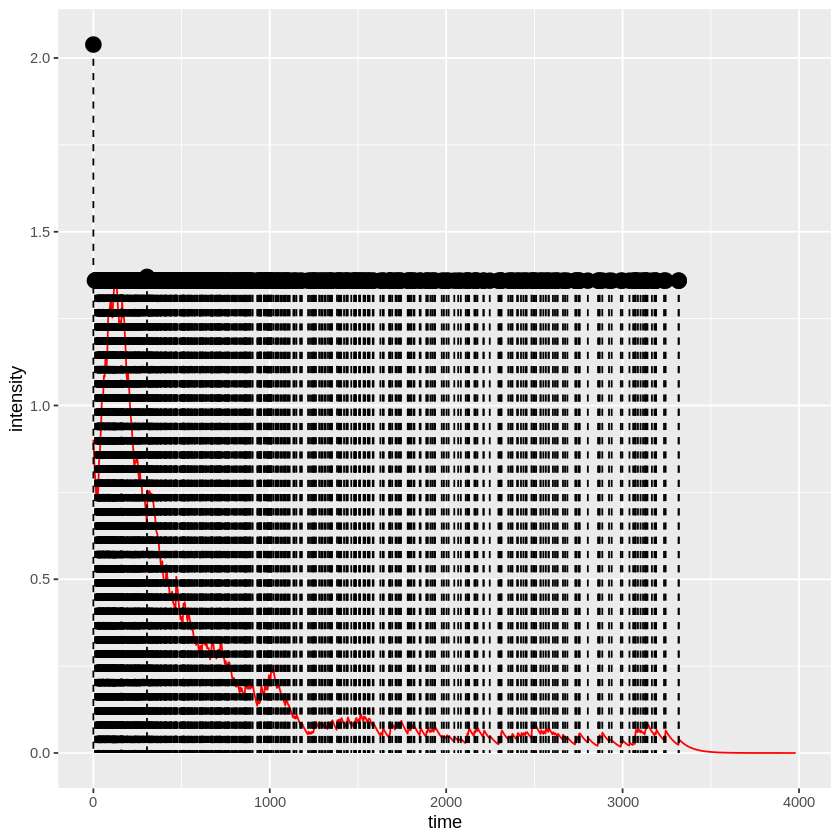

In [84]:
model_1_subset_1 <- fit_series(subset_1_limited, model_type = 'mEXP', cores = 4, observation_time = max(subset_1_limited$time))
plot_event_series(model_1_subset_1)

In [85]:
true_size <- nrow(subset_1_full)
pred_size <- predict_final_popularity(model_1_subset_1)

cat('Branching factor: ', get_branching_factor(model_1_subset_1), '\n')
cat('Rozmiar kaskady: ', true_size, '| Predykowany rozmiar kaskady: ', pred_size, '\n')
cat('Błąd względny wynosi: ', 100*abs(true_size-pred_size)/true_size, '% \n')

Branching factor:  0.1508404 
Rozmiar kaskady:  1386 | Predykowany rozmiar kaskady:  703.3486 
Błąd względny wynosi:  49.25334 % 


### Model #2 - EXP + 1 tweet subset


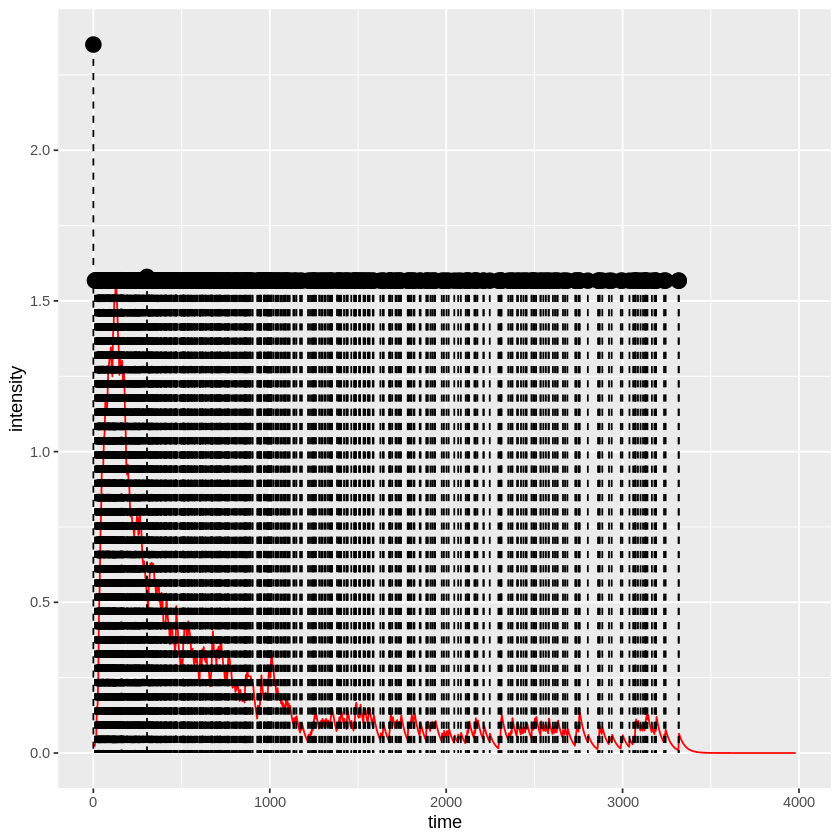

In [86]:
model_2_subset_1 <- fit_series(subset_1_limited, model_type = 'EXP', cores = 4, observation_time = max(subset_1_limited$time))
plot_event_series(model_2_subset_1)

In [87]:
true_size <- nrow(subset_1_full)
pred_size <- predict_final_popularity(model_2_subset_1)

cat('Branching factor: ', get_branching_factor(model_2_subset_1), '\n')
cat('Rozmiar kaskady: ', true_size, '| Predykowany rozmiar kaskady: ', pred_size, '\n')
cat('Błąd względny wynosi: ', 100*abs(true_size-pred_size)/true_size, '% \n')

Warning message in predict_final_popularity.hawkes(model_2_subset_1):
“Branching Factor greater than 1, not possible to predict the size(super critical)”


Branching factor:  1 
Rozmiar kaskady:  1386 | Predykowany rozmiar kaskady:  Inf 
Błąd względny wynosi:  Inf % 


### Model #3 - mEXP + 2 tweet subset

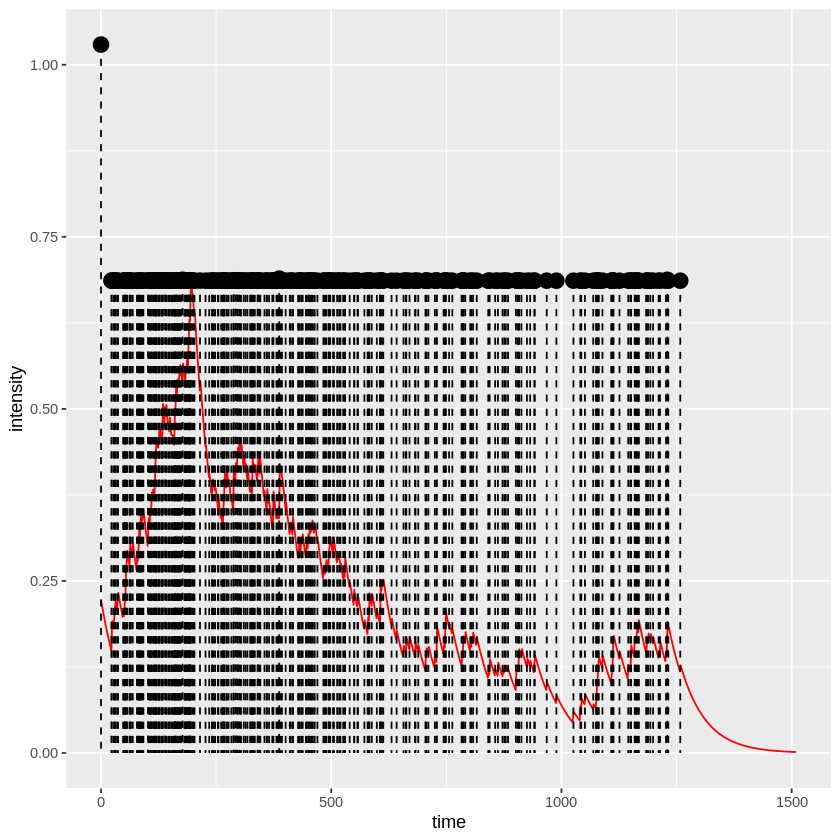

In [88]:
model_1_subset_2 <- fit_series(subset_2_limited, model_type = 'mEXP', cores = 4, observation_time = max(subset_2_limited$time))
plot_event_series(model_1_subset_2)

In [89]:
true_size <- nrow(subset_2_full)
pred_size <- predict_final_popularity(model_1_subset_2)

cat('Branching factor: ', get_branching_factor(model_1_subset_2), '\n')
cat('Rozmiar kaskady: ', true_size, '| Predykowany rozmiar kaskady: ', pred_size, '\n')
cat('Błąd względny wynosi: ', 100*abs(true_size-pred_size)/true_size, '% \n')

Branching factor:  0.3669287 
Rozmiar kaskady:  791 | Predykowany rozmiar kaskady:  311.3319 
Błąd względny wynosi:  60.64072 % 


### Model #4 - EXP + 2 tweet subset

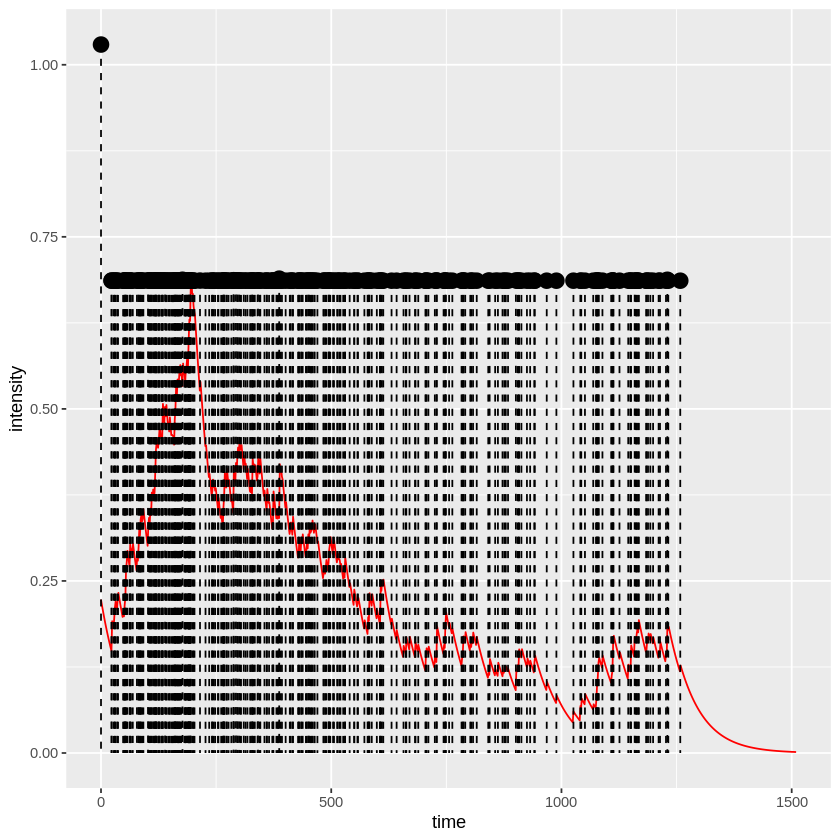

In [90]:
model_2_subset_2 <- fit_series(subset_2_limited, model_type = 'mEXP', cores = 4, observation_time = max(subset_2_limited$time))
plot_event_series(model_2_subset_2)

In [91]:
true_size <- nrow(subset_2_full)
pred_size <- predict_final_popularity(model_2_subset_2)

cat('Branching factor: ', get_branching_factor(model_2_subset_2), '\n')
cat('Rozmiar kaskady: ', true_size, '| Predykowany rozmiar kaskady: ', pred_size, '\n')
cat('Błąd względny wynosi: ', 100*abs(true_size-pred_size)/true_size, '% \n')

Branching factor:  0.3669292 
Rozmiar kaskady:  791 | Predykowany rozmiar kaskady:  311.3319 
Błąd względny wynosi:  60.64072 % 
